<a href="https://colab.research.google.com/github/lerakutt2/myprojects/blob/main/moad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Анализ полиномиальной регрессии

In [ ]:
import pandas as pd

df = pd.read_csv('/content/salary_experience.csv')
df.sample(10)

FileNotFoundError: [Errno 2] No such file or directory: '/content/salary_experience.csv'

In [ ]:
import matplotlib.pyplot as plt

df.Exp.name = 'Опыт работы, лет'
df.Salary.name = 'Зарплата, т.р.'

plt.title('Исходные данные')
plt.scatter(df.Exp, df.Salary)
plt.xlabel('Опыт работы, лет')
plt.ylabel('Зарплата, т.р.')

In [ ]:
import numpy as np

print(df.corr())

print(np.corrcoef(df.Exp.to_numpy(), df.Salary.to_numpy()))

Коэффициент корреляции стажа и зарплаты равен 0.93, что говорит о наличии сильной зависимости этих признаков.

In [ ]:
from sklearn import linear_model

exp = df.Exp.to_frame()
salary = df.Salary.to_frame()

skregr = linear_model.LinearRegression()

skregr.fit(exp, salary)
print("a =", skregr.coef_[0][0],", b =", skregr.intercept_[0])

In [ ]:
plt.title('Линейная регрессия')
plt.scatter(exp, salary, label='Исходные данные')
plt.plot(exp, skregr.predict(exp), label='Линейная\nРегрессия {:.3f}x + {:.3f}'.format(skregr.coef_[0][0], skregr.intercept_[0]), color='red')
plt.legend()
plt.title('')
plt.xlabel('Опыт работы, лет')
plt.ylabel('Зарплата, т.р.')
plt.show()

In [ ]:
import sklearn.metrics as metr
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


class PolyRegression:
  def __init__(self, x : pd.DataFrame, y : pd.DataFrame, degree):
    self.x = x
    self.y = y
    self.degree = degree
    self.model = linear_model.LinearRegression()
    self.poly_features = PolynomialFeatures(self.degree, include_bias=False)
    self.x_line, self.y_line = self.line()


  def line(self):
    ''' Строит модель полиномиальной регрессии для одного
    признака и возвращает массивы x и y для построения графика '''
    X_poly = self.poly_features.fit_transform(self.x.values)
    self.model.fit(X_poly, self.y)
    x_new = np.linspace(self.x.min(), self.x.max(), 100).reshape(100, 1)
    x_new_poly = self.poly_features.transform(x_new)
    # чем отличаются функции?
    y_new = self.model.predict(x_new_poly)
    self.metrics(self.y, self.model.predict(X_poly))
    return x_new, y_new


  def plot(self):
    ''' Строит график полинома и диаграмму рассеяния данных '''
    plt.title('Полином степени {}'.format(self.degree))
    plt.scatter(self.x, self.y, color='red', label='Исходные данные')
    plt.plot(self.x_line, self.y_line, label='Полином степени {}'.format(self.degree))
    plt.xlabel(self.x.columns[0])
    plt.ylabel(self.y.columns[0])
    plt.legend()
    plt.show()


  def metrics(self, y, y_pred):
    ''' Считает значения метрик '''
    self.r2_score = metr.r2_score(y_pred, y)
    self.max_error = metr.max_error(y_pred, y)
    self.mse = metr.mean_squared_error(y_pred, y)
    self.mae = metr.mean_absolute_error(y_pred, y)
    self.median_absolute_error = metr.median_absolute_error(y_pred, y)
    self.mape = metr.mean_absolute_percentage_error(y_pred, y)

  def print_metrics(self):
    ''' Печатает значения метрик '''
    print("Коэффициент детерминации: ", self.r2_score)
    print("Максимальная остаточная ошибка: ", self.max_error)
    print("Средняя квадратическая ошибка:", self.mse)
    print("Средняя абсолютная ошибка: ", self.mae)
    print("Медианная абсолютная ошибка: ", self.median_absolute_error)
    print("Средняя абсолютная процентная ошибка: ", self.mape)


  def predict(self, x):
    return self.model.predict(self.poly_features.transform([[x]]))


  def weights(self):
    n = len(self.model.coef_[0])
    for i in range(n):
      print(self.model.coef_[0][i], 'x^',n-i, '+', end='')

In [ ]:
import sklearn.metrics as metr
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x = [[1, 2], [3, 4]]
poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(x)

array([[ 1.,  1.,  2.,  2.],
       [ 1.,  3.,  4., 12.]])

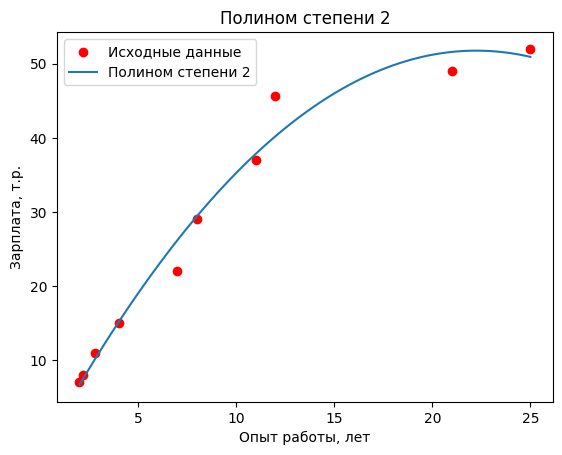

Метрики: 
Коэффициент детерминации:  0.9786175482767719
Максимальная остаточная ошибка:  5.488121510898566
Средняя квадратическая ошибка: 5.747529688064234
Средняя абсолютная ошибка:  1.638656916224221
Медианная абсолютная ошибка:  0.8440193390540207
Средняя абсолютная процентная ошибка:  0.060604017057356796
4.895285463554003 x^ 2 +-0.11005038991723912 x^ 1 +None


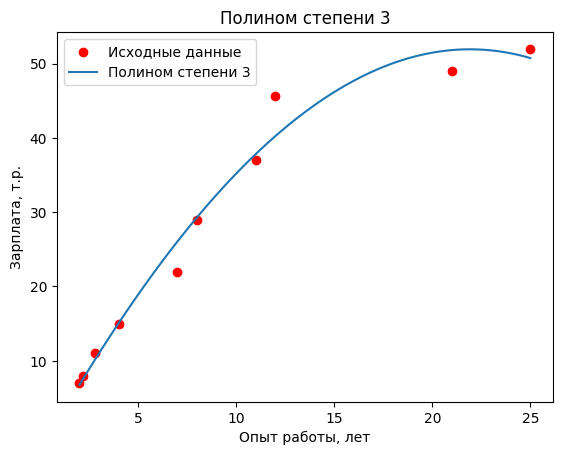

Метрики: 
Коэффициент детерминации:  0.9786699756528312
Максимальная остаточная ошибка:  5.436906516887731
Средняя квадратическая ошибка: 5.733731700597514
Средняя абсолютная ошибка:  1.626047449452028
Медианная абсолютная ошибка:  0.8369710643893127
Средняя абсолютная процентная ошибка:  0.0574549882035905
4.721260114516167 x^ 3 +-0.09206891830247327 x^ 2 +-0.0004750566939837747 x^ 1 +None


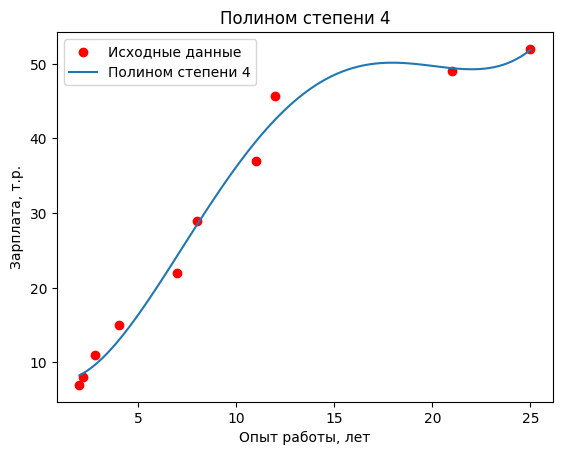

Метрики: 
Коэффициент детерминации:  0.988846322226765
Максимальная остаточная ошибка:  3.1278549160581903
Средняя квадратическая ошибка: 3.028398643319975
Средняя абсолютная ошибка:  1.4334289157568318
Медианная абсолютная ошибка:  1.282532283814084
Средняя абсолютная процентная ошибка:  0.07756611406548145
-1.6189400539780003 x^ 4 +0.9052587259101286 x^ 3 +-0.0568705211398154 x^ 2 +0.0010414792502912995 x^ 1 +None


In [ ]:
regs = {
    2: PolyRegression(exp, salary, 2),
    3: PolyRegression(exp, salary, 3),
    4: PolyRegression(exp, salary, 4)
}

for reg in regs.values():
  reg.plot()
  print("Метрики: ")
  reg.print_metrics()
  print(reg.weights())

In [ ]:
def compare_regs(x, y, regs : dict):
  '''Создает датафрейм с метриками всех типов регрессии'''
  all_metrics = []
  for reg in regs.values():
    all_metrics.append([reg.r2_score, reg.max_error, reg.mse, reg.mae, reg.median_absolute_error, reg.mape])

  all_metrics = pd.DataFrame(all_metrics, columns=["Коэффициент детерминации",
                                                  "Максимальная остаточная ошибка",
                                                  "Средняя квадратическая ошибка",
                                                  "Средняя абсолютная ошибка",
                                                  "Медианная абсолютная ошибка",
                                                  "Средняя абсолютная процентная ошибка"],
                             index=regs.keys())
  return all_metrics

def plot(x, y, regs : dict):
  ''' Строит общий график линий регрессии '''
  for degree in regs.keys():
    x_line, y_line = regs[degree].line()
    plt.plot(x_line, y_line, label='Полином степени {}'.format(degree))

  plt.title('Полиномиальная регрессия')
  plt.scatter(x, y, color='red', label='Исходные данные')
  plt.xlabel('Опыт работы, лет')
  plt.ylabel('Зарплата, т.р.')
  plt.legend()
  plt.show()

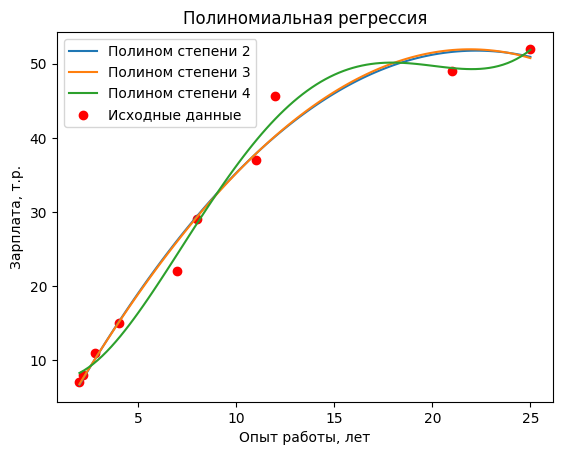

,Коэффициент детерминации,Максимальная остаточная ошибка,Средняя квадратическая ошибка,Средняя абсолютная ошибка,Медианная абсолютная ошибка,Средняя абсолютная процентная ошибка
2,0.978618,5.488122,5.747530,1.638657,0.844019,0.060604
3,0.978670,5.436907,5.733732,1.626047,0.836971,0.057455
4,0.988846,3.127855,3.028399,1.433429,1.282532,0.077566


In [ ]:
plot(exp, salary, regs)
compare_regs(exp, salary, regs)


In [ ]:
print('Со стажем 15 лет зарплата будет:')
for degree in regs.keys():
  print(regs[degree].predict(15)[0][0], 'т.р., (полином степени {})'.format(degree))

Со стажем 15 лет зарплата будет:
45.983653296467075 т.р., (полином степени 2)
46.18687306916917 т.р., (полином степени 3)
48.50430671540891 т.р., (полином степени 4)


In [ ]:
print('Со стажем 53 года зарплата будет:')
for degree in regs.keys():
  print(regs[degree].predict(53)[0][0], 'т.р., (полином степени {})'.format(degree))

Со стажем 53 года зарплата будет:
-52.3657066346267 т.р., (полином степени 2)
-81.43302656083458 т.р., (полином степени 3)
2216.4459148023434 т.р., (полином степени 4)


Выводы: наиболее правдоподобные результаты в последнем предсказании выдает полином 4 степени, а также у него наибольший коэффициент детерминации и наименьшая максимальная остаточная ошибка, средняя квадратическая ошибка, средняя абсолютная ошибка среди всех остальных полиномов. Исходя из этого, можно говорить о том, что четвертая степень полинома больше всего подходит для описания исходных данных, однако стоит учитывать, что экземпляров слишком мало для построения качественной модели и её однозначной оценки.

In [ ]:
polynom = pd.read_csv('/content/findPolinom.csv')
polynom.head(10)

,X,y
0,3.322465,186.859959
1,0.637075,-15.229382
2,1.901986,82.740977
3,8.035820,654.893421
4,-0.796672,-6.709494
5,5.029678,284.293548
6,4.252771,177.473586
7,5.627813,297.202342
8,-3.454958,-278.174149
9,2.236295,166.932891


<Axes: xlabel='X', ylabel='y'>

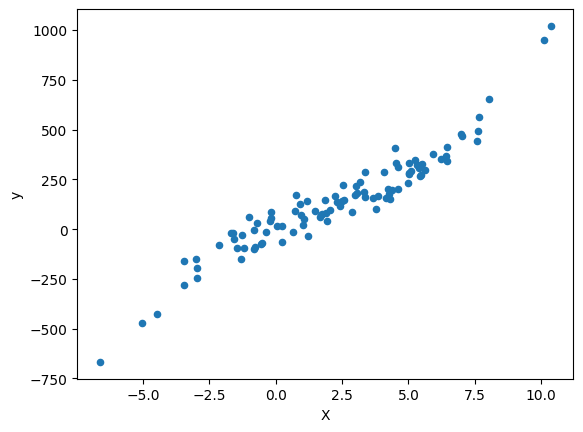

In [ ]:
polynom.plot(kind='scatter', x='X', y='y')

In [ ]:
new_regs = {}
x = polynom.X.to_frame()
y = polynom.y.to_frame()
index = range(2, 50)
for i in index:
  new_regs[i] = PolyRegression(x, y, i)

all_metrics = compare_regs(x, y, new_regs)
all_metrics

,Коэффициент детерминации,Максимальная остаточная ошибка,Средняя квадратическая ошибка,Средняя абсолютная ошибка,Медианная абсолютная ошибка,Средняя абсолютная процентная ошибка
2,0.884219,265.665949,6163.817740,60.263248,45.597859,0.612829
3,0.949963,163.937285,2830.588616,43.534240,40.583163,0.780752
4,0.950254,163.843984,2814.924549,43.378463,37.943730,0.748693
5,0.950289,164.940058,2813.046472,43.313212,38.085334,0.781460
6,0.950825,161.582351,2784.147273,42.700931,38.270520,0.894861
7,0.951812,159.154733,2730.809511,42.474893,37.089544,0.941595
8,0.951820,159.650056,2730.406919,42.457454,37.742890,0.974151
9,0.951842,159.593847,2729.204693,42.266749,37.565881,1.034982
10,0.951842,159.598995,2729.204658,42.266445,37.566139,1.035936
11,0.952419,157.371206,2697.961191,41.625531,39.020774,1.938427


In [ ]:
for i in range(all_metrics.shape[1]):
  col = all_metrics[all_metrics.columns[i]]
  print(all_metrics.columns[i], 'достигает максимума в полиноме', col[col == col.max()].index[0], 'степени и равна', col[col == col.max()].item())
  print(all_metrics.columns[i], 'достигает минимума в полиноме', col[col == col.min()].index[0], 'степени и равна', col[col == col.max()].item())

Коэффициент детерминации достигает максимума в полиноме 13 степени и равна 0.9528794353380534
Коэффициент детерминации достигает минимума в полиноме 49 степени и равна 0.9528794353380534
Максимальная остаточная ошибка достигает максимума в полиноме 33 степени и равна 591.258168125723
Максимальная остаточная ошибка достигает минимума в полиноме 11 степени и равна 591.258168125723
Средняя квадратическая ошибка достигает максимума в полиноме 49 степени и равна 30978.166522555308
Средняя квадратическая ошибка достигает минимума в полиноме 13 степени и равна 30978.166522555308
Средняя абсолютная ошибка достигает максимума в полиноме 48 степени и равна 135.26350405994629
Средняя абсолютная ошибка достигает минимума в полиноме 13 степени и равна 135.26350405994629
Медианная абсолютная ошибка достигает максимума в полиноме 40 степени и равна 114.90661325681901
Медианная абсолютная ошибка достигает минимума в полиноме 7 степени и равна 114.90661325681901
Средняя абсолютная процентная ошибка дос

Можно видеть, что коэффициент детерминации достигает максимума в полиноме 13 степени, а также в этом полиноме достигает минимума средняя квадратическая ошибка и средняя абсолютная ошибка

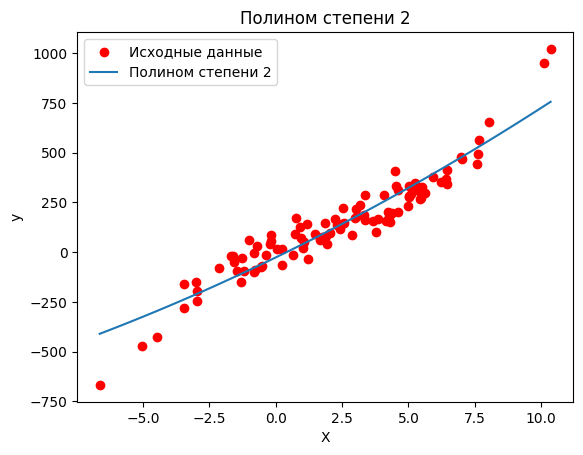

(array([[64.76699145,  1.03940924]]), array([-26.72524132]))
Коэффициент детерминации:  0.8842194823104775
Максимальная остаточная ошибка:  265.66594920108275
Средняя квадратическая ошибка: 6163.817739573593
Средняя абсолютная ошибка:  60.2632476248113
Медианная абсолютная ошибка:  45.597859358628085
Средняя абсолютная процентная ошибка:  0.6128288272203894


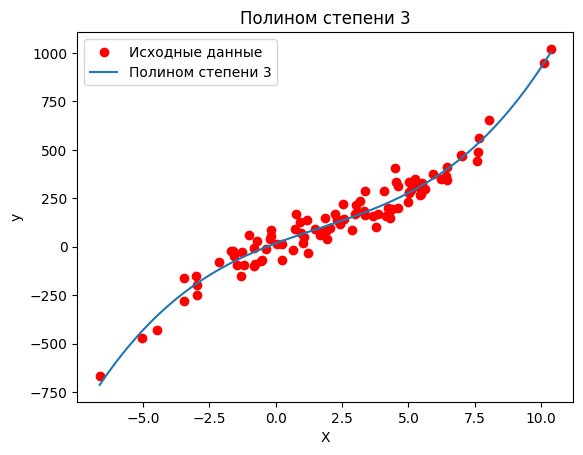

(array([[51.69031522, -3.75122212,  0.76722218]]), array([17.47327249]))
Коэффициент детерминации:  0.9499633605768155
Максимальная остаточная ошибка:  163.9372851920831
Средняя квадратическая ошибка: 2830.588616410084
Средняя абсолютная ошибка:  43.534240058635206
Медианная абсолютная ошибка:  40.583162833102556
Средняя абсолютная процентная ошибка:  0.7807520763346849


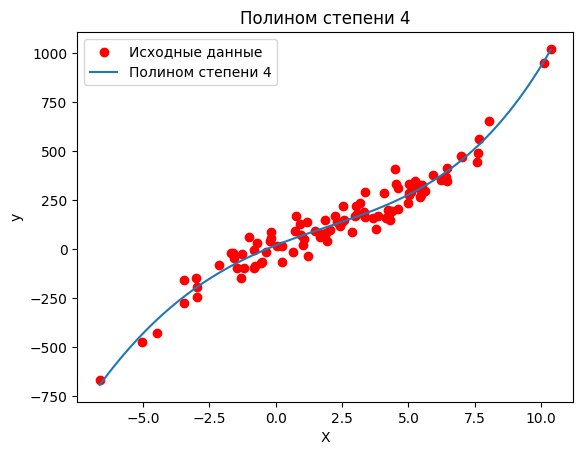

(array([[ 5.40690770e+01, -4.11662108e+00,  6.71951420e-01,
         1.15615993e-02]]), array([18.22958493]))
Коэффициент детерминации:  0.950254030519786
Максимальная остаточная ошибка:  163.8439835559215
Средняя квадратическая ошибка: 2814.9245494281467
Средняя абсолютная ошибка:  43.37846325057486
Медианная абсолютная ошибка:  37.94372993297294
Средняя абсолютная процентная ошибка:  0.7486931573534941


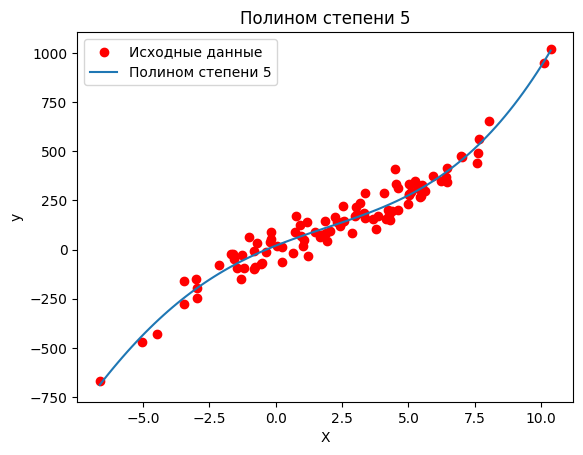

(array([[ 5.39736565e+01, -4.48153663e+00,  7.09578104e-01,
         2.08655008e-02, -9.50854353e-04]]), array([19.45921951]))
Коэффициент детерминации:  0.9502888702275074
Максимальная остаточная ошибка:  164.94005812603902
Средняя квадратическая ошибка: 2813.046471708265
Средняя абсолютная ошибка:  43.31321246793102
Медианная абсолютная ошибка:  38.085334243999455
Средняя абсолютная процентная ошибка:  0.7814600314047686


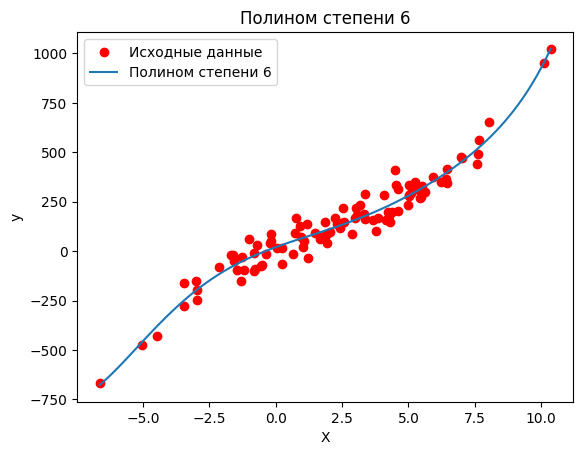

(array([[ 4.90411697e+01, -4.35708030e+00,  1.27739456e+00,
        -2.15920202e-02, -1.17995361e-02,  9.71052342e-04]]), array([20.07532455]))
Коэффициент детерминации:  0.9508246799513116
Максимальная остаточная ошибка:  161.58235119584702
Средняя квадратическая ошибка: 2784.1472731974086
Средняя абсолютная ошибка:  42.70093099733349
Медианная абсолютная ошибка:  38.27052025990649
Средняя абсолютная процентная ошибка:  0.8948612860978262


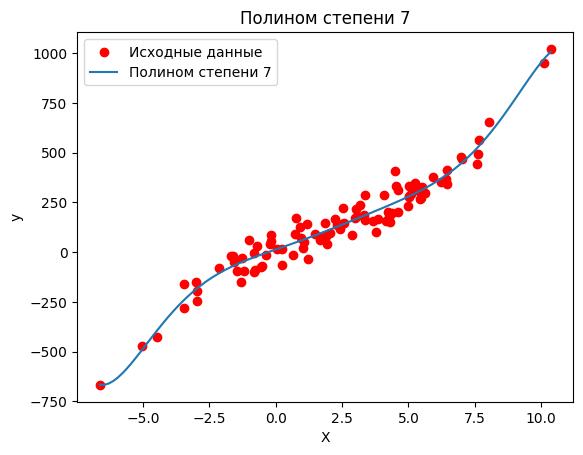

(array([[ 4.65710052e+01, -2.49448299e-01,  1.33075723e+00,
        -3.19625340e-01,  4.04655440e-03,  5.71894892e-03,
        -3.75846521e-04]]), array([13.25246059]))
Коэффициент детерминации:  0.9518121612861666
Максимальная остаточная ошибка:  159.15473343447198
Средняя квадратическая ошибка: 2730.8095113227428
Средняя абсолютная ошибка:  42.47489318981538
Медианная абсолютная ошибка:  37.08954354812731
Средняя абсолютная процентная ошибка:  0.9415951484620071


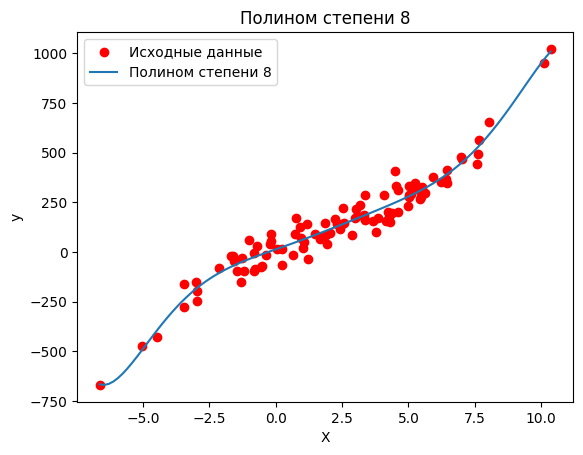

(array([[ 4.71368967e+01, -7.68615750e-02,  1.18746158e+00,
        -3.26077592e-01,  1.20007949e-02,  5.43656767e-03,
        -4.89012670e-04,  7.99747474e-06]]), array([12.96960644]))
Коэффициент детерминации:  0.9518196077152433
Максимальная остаточная ошибка:  159.65005568695486
Средняя квадратическая ошибка: 2730.406918541842
Средняя абсолютная ошибка:  42.45745382071429
Медианная абсолютная ошибка:  37.74288992346116
Средняя абсолютная процентная ошибка:  0.9741513005362702


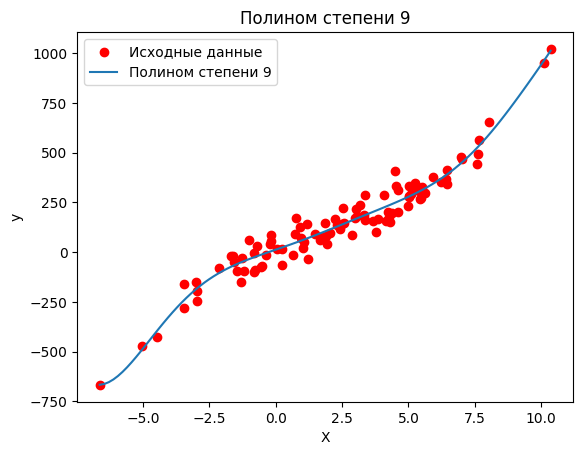

(array([[ 4.59539223e+01,  5.36928108e-01,  1.44519117e+00,
        -4.20129011e-01,  1.71318684e-03,  9.74235996e-03,
        -5.17977296e-04, -4.84122410e-05,  3.27972994e-06]]), array([12.33078938]))
Коэффициент детерминации:  0.9518418436790108
Максимальная остаточная ошибка:  159.5938469963201
Средняя квадратическая ошибка: 2729.2046927913993
Средняя абсолютная ошибка:  42.26674884431035
Медианная абсолютная ошибка:  37.56588127537039
Средняя абсолютная процентная ошибка:  1.0349818976900709


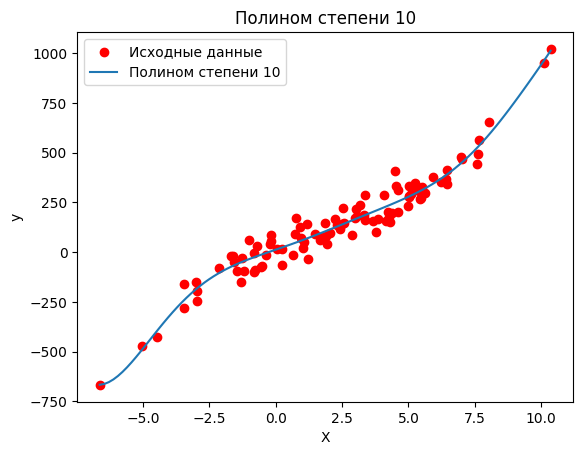

(array([[ 4.59540580e+01,  5.43802796e-01,  1.44428405e+00,
        -4.21084633e-01,  1.87080887e-03,  9.77801910e-03,
        -5.25396108e-04, -4.86034830e-05,  3.37782531e-06,
        -4.63989158e-09]]), array([12.32431278]))
Коэффициент детерминации:  0.9518418443181595
Максимальная остаточная ошибка:  159.59899491601263
Средняя квадратическая ошибка: 2729.204657939057
Средняя абсолютная ошибка:  42.26644501841745
Медианная абсолютная ошибка:  37.566138718809384
Средняя абсолютная процентная ошибка:  1.0359357577320838


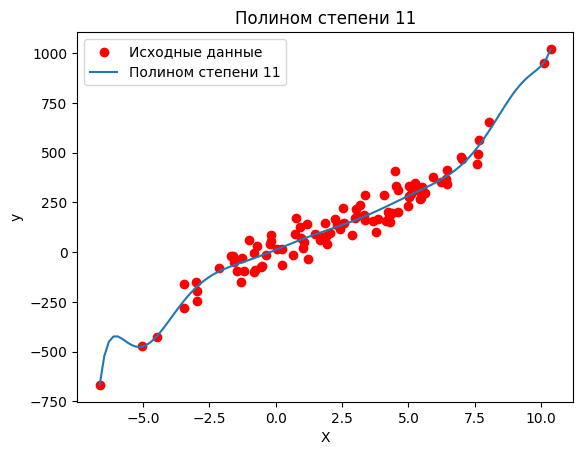

(array([[ 5.39827539e+01,  1.89950211e+00, -2.30901588e+00,
        -3.33791300e-01,  4.09663460e-01, -2.96768110e-02,
        -1.45938926e-02,  2.03791385e-03,  1.01644777e-04,
        -2.84834234e-05,  1.19889379e-06]]), array([11.33477172]))
Коэффициент детерминации:  0.952419381266469
Максимальная остаточная ошибка:  157.37120624433737
Средняя квадратическая ошибка: 2697.9611905672546
Средняя абсолютная ошибка:  41.62553148608581
Медианная абсолютная ошибка:  39.0207741593279
Средняя абсолютная процентная ошибка:  1.9384265646629573


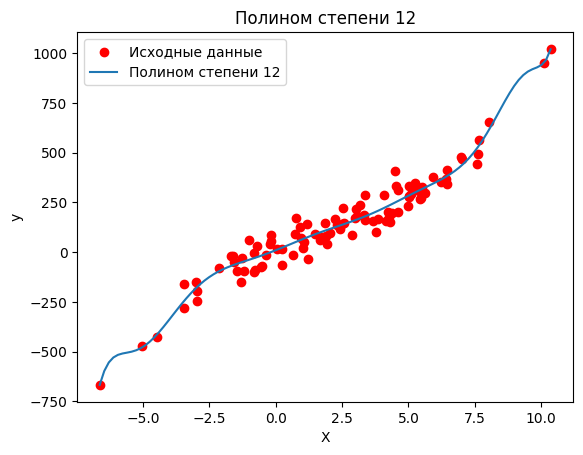

(array([[ 5.29897516e+01,  4.61001040e+00, -2.02793091e+00,
        -9.80513258e-01,  4.18694746e-01,  2.28278317e-02,
        -1.88054287e-02,  4.65594346e-04,  3.08563873e-04,
        -1.77286880e-05, -1.50649834e-06,  1.07942332e-07]]), array([9.42833422]))
Коэффициент детерминации:  0.9524776262705744
Максимальная остаточная ошибка:  158.3369963032137
Средняя квадратическая ошибка: 2694.8066280969065
Средняя абсолютная ошибка:  41.56926193376021
Медианная абсолютная ошибка:  38.60618885612416
Средняя абсолютная процентная ошибка:  2.4840698859556225


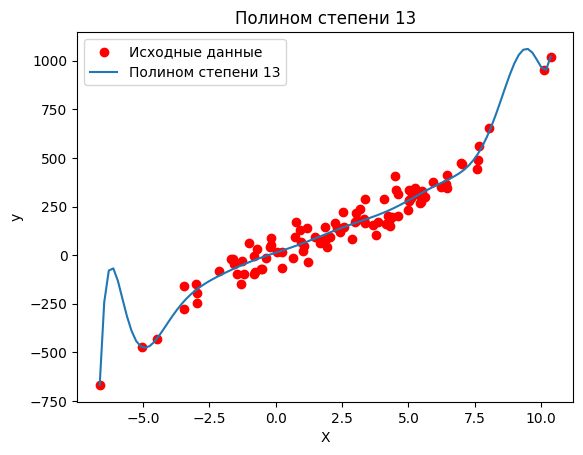

(array([[ 4.52510897e+01, -8.09234445e-01,  3.31168891e+00,
        -2.98050253e-02, -4.99916107e-01,  1.65802384e-03,
         4.25278148e-02, -2.97391132e-03, -1.33035643e-03,
         1.65288674e-04,  9.57526947e-06, -2.24925530e-06,
         8.87212958e-08]]), array([12.69906499]))
Коэффициент детерминации:  0.9528794353380534
Максимальная остаточная ошибка:  162.7763249070396
Средняя квадратическая ошибка: 2673.0493296185978
Средняя абсолютная ошибка:  41.13472348851324
Медианная абсолютная ошибка:  38.97524454719794
Средняя абсолютная процентная ошибка:  0.9697495043250604


In [ ]:
for i in range(2, 14):
  new_regs[i].plot()
  print(new_regs[i].weights())
  new_regs[i].print_metrics()

Источники:

https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0
